### Importing Libraries 

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy.stats import norm
from textblob import TextBlob

### Importing and Exploring the data

In [2]:
data= pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
TextBlob("i hate this dress").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [7]:
TextBlob("this dress is awesome").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

### Cleaning Data

In [9]:
# dropn nas
data.dropna(subset=["Review Text","Title",  "Rating", "Division Name", "Department Name"], inplace=True)
data.info()
data.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [10]:
data.drop(['Unnamed: 0', 'Recommended IND'], axis = 1, inplace = True) 
data

,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses


In [11]:
data.drop(['Positive Feedback Count', "Age", 'Class Name'], axis = 1, inplace = True) 
data

,Clothing ID,Title,Review Text,Rating,Division Name,Department Name
0,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
1,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
2,847,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
3,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
4,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
...,...,...,...,...,...,...
19657,1104,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
19658,862,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
19659,1104,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
19660,1084,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      19662 non-null  int64 
 1   Title            19662 non-null  object
 2   Review Text      19662 non-null  object
 3   Rating           19662 non-null  int64 
 4   Division Name    19662 non-null  object
 5   Department Name  19662 non-null  object
dtypes: int64(2), object(4)
memory usage: 921.8+ KB


In [16]:
data.columns = data.columns.str.lower()
data

,clothing id,title,review text,rating,division name,department name
0,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
1,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
2,847,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
3,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
4,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
...,...,...,...,...,...,...
19657,1104,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
19658,862,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
19659,1104,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
19660,1084,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


In [17]:
data.columns = data.columns.str.replace(' ','_')
data

,clothing_id,title,review_text,rating,division_name,department_name
0,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
1,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
2,847,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
3,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
4,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
...,...,...,...,...,...,...
19657,1104,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
19658,862,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
19659,1104,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
19660,1084,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


#### Checking if the majority of reviews are positive or negative

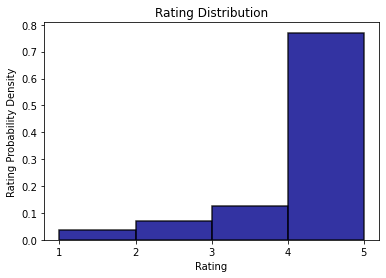

In [18]:
#Create bin for rating
rating_bin = np.arange(1, 6, 1)

#Create histogram
plt.hist(data['rating'], bins = rating_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add labels and title
plt.xlabel("Rating")
plt.ylabel("Rating Probability Density")
plt.title("Rating Distribution")

#Set x axis ticks to match bins
plt.xticks(rating_bin)

plt.show()

#### The histogram is clearly skewed to the left so the majority of reviews are positive.

### Summarise the average rating by division department as a new dataframe 

In [105]:
rating_by_dd=data.groupby(["division_name", "department_name"]).agg({"rating":"mean"})
sorted_ratings =rating_by_dd.sort_values('rating')

<AxesSubplot:xlabel='division_name,department_name'>

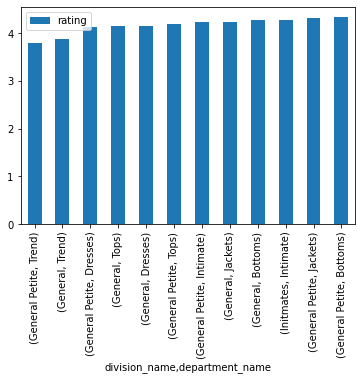

In [106]:
sorted_ratings.plot.bar()

### Sample check on the review column

In [60]:
R_check1 = TextBlob(data.at[5, "review_text"])
R_check1.sentiment

Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)

In [61]:
R_check2 = TextBlob(data.at[10, "review_text"])
R_check2.sentiment

Sentiment(polarity=0.19214285714285717, subjectivity=0.511904761904762)

In [62]:
R_check3 = TextBlob(data.at[15, "review_text"])
R_check3.sentiment

Sentiment(polarity=0.10238095238095238, subjectivity=0.680952380952381)

### Working on text

In this step we change text to tokens and convertion all of the words to lower case. Next we remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.
The function to remove punctuation and change to tokens

In [67]:
import re

In [68]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [69]:
data['review_clear'] = data['review_text'].apply(tokens)
data.head()

,clothing_id,title,review_text,rating,division_name,department_name,sentiment,review_clear
0,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,i had such high hopes for this dress and reall...
1,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,i love love love this jumpsuit it s fun flirty...
2,847,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,this shirt is very flattering to all due to th...
3,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,0.178750,i love tracy reese dresses but this one is not...
4,858,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,0.133750,i aded this in my basket at hte last mintue to...


In [72]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None 

In [114]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
#?WordCloud #Uncomment to get information about wordcloud
review_clear = data["review_clear"].tolist()
review_clear

['i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c',
 'i love love love this jumpsuit it s fun flirty and fabulous every time i wear it i get nothing but great compliments',
 'this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt',
 'i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dres

### Most Common words in Review

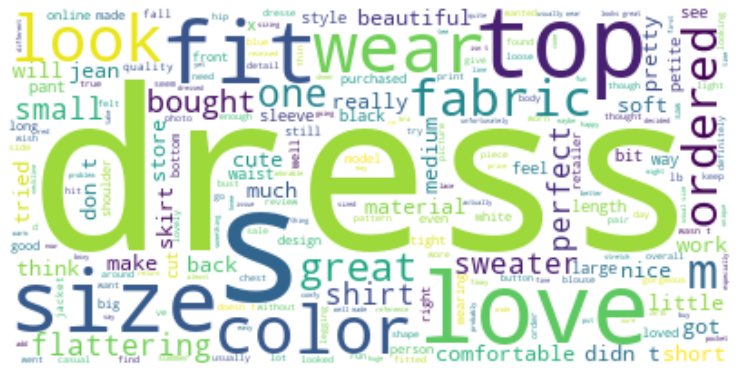

In [115]:
wordcloud = WordCloud(background_color="white", max_words=len(review_clear))

wordcloud.generate(str(review_clear))

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Function with lambda (or other preferred method) to calculate sentiment polarity for each row

In [74]:
data["ploarity"] = data["review_clear"].apply(lambda x:TextBlob(x).sentiment.polarity)

### The minimum review polarity, by division and department as a new dataframe

In [98]:
dd_by_pol = data.groupby(["division_name", "department_name"]).agg({"sentiment":"min"})
dd_by_pol
sorted_dd_by_pol=dd_by_pol.sort_values('sentiment')

<AxesSubplot:xlabel='division_name,department_name'>

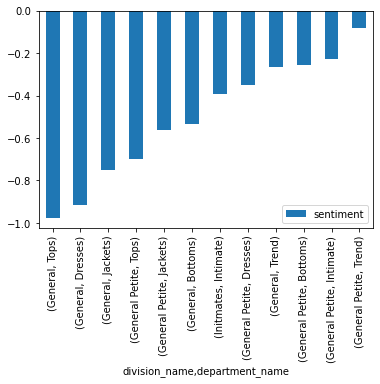

In [99]:
sorted_dd_by_pol.plot.bar()

### The average review polarity, by division and department

In [96]:
dd_by_rev = data.groupby(["division_name", "department_name"]).agg({"sentiment":"mean"})
dd_by_rev
sorted_dd_by_rev=dd_by_rev.sort_values('sentiment')

<AxesSubplot:xlabel='division_name,department_name'>

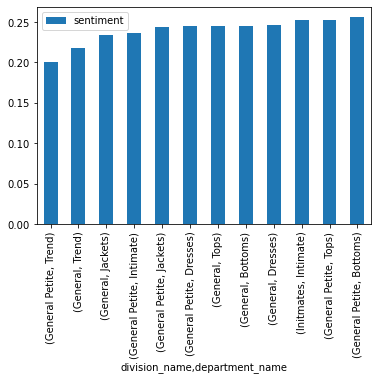

In [97]:
sorted_dd_by_rev.plot.bar()